In [ ]:
import pandas as pd
patient_file_path = '/content/Updated_Patient_Dataset.csv'
patient_data = pd.read_csv(patient_file_path)

In [ ]:
patient_data.head()

,Patient_ID,Name,Identity_number,Age,Contact_number,Emergency_number,Allergy,Chronic_condition
0,1,Ahmad Razali,950314-12-1234,29,012-3456789,017-1234567,Penicillin,Heart Disease
1,2,Lim Wei Sheng,870623-08-5678,37,016-1234567,019-8765432,Dust,Diabetes
2,3,Siti Aishah,800412-06-3456,44,011-2345678,013-7654321,Pollen,Stroke
3,4,Arvind Kumar,760818-05-2345,48,010-9876543,012-3459876,Peanuts,Lung Infections
4,5,Wong Mei Ling,900110-14-8765,34,014-7654321,017-6543210,Shellfish,Lung Cancer


In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         635 non-null    int64 
 1   Name               635 non-null    object
 2   Identity_number    635 non-null    object
 3   Age                635 non-null    int64 
 4   Contact_number     635 non-null    object
 5   Emergency_number   635 non-null    object
 6   Allergy            491 non-null    object
 7   Chronic_condition  478 non-null    object
 8   Gender             635 non-null    object
 9   Blood Type         635 non-null    object
dtypes: int64(2), object(8)
memory usage: 49.7+ KB


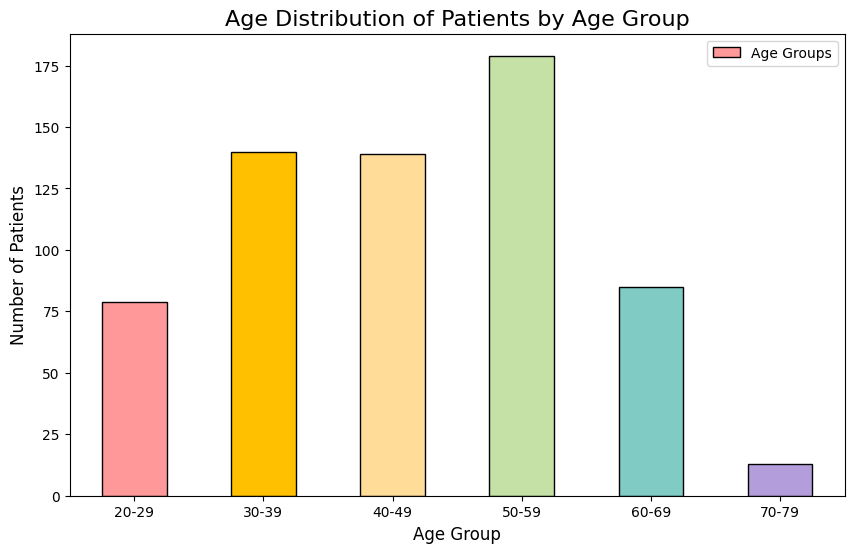

In [ ]:
import matplotlib.pyplot as plt

# Plotting the age distribution with age bins and different colors
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
patient_data['Age Group'] = pd.cut(patient_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot histogram
plt.figure(figsize=(10, 6))
age_colors = ['#FF9999', '#FFC000', '#FFDD99', '#C5E1A5', '#80CBC4', '#B39DDB']

patient_data['Age Group'].value_counts(sort=False).plot(kind='bar', color=age_colors, edgecolor='black')

# Adding title and labels
plt.title('Age Distribution of Patients by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Age Groups'], loc='upper right')

# Display the plot
plt.show()


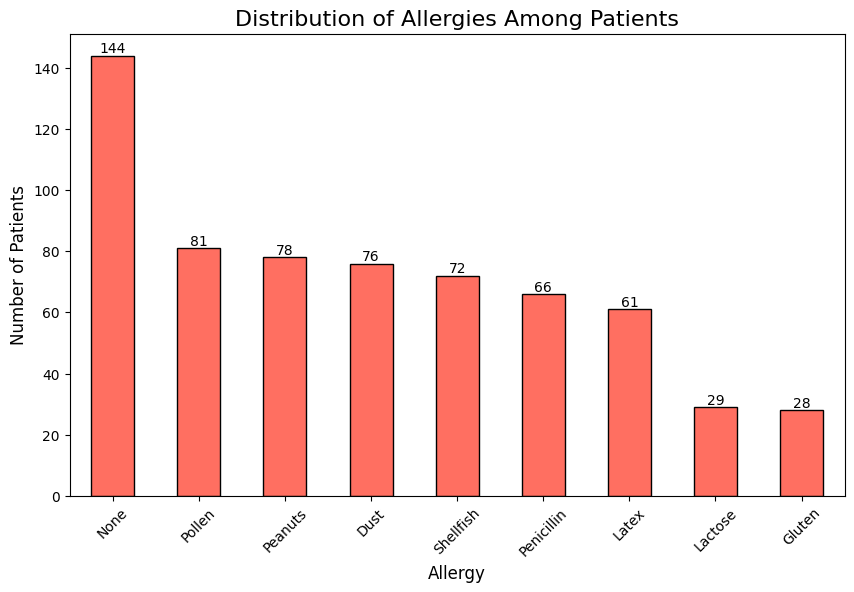

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace NaN values in Allergy column with 'None'
patient_data['Allergy'] = patient_data['Allergy'].fillna('None')

# Bar Chart with Annotations for Allergy Distribution
plt.figure(figsize=(10, 6))
ax = patient_data['Allergy'].value_counts().plot(kind='bar', color='#FF6F61', edgecolor='black')

# Annotating frequencies on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                ha='center', fontsize=10)

plt.title('Distribution of Allergies Among Patients', fontsize=16)
plt.xlabel('Allergy', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
patient_data['Allergy'] = patient_data['Allergy'].str.strip().str.lower()
print(patient_data['Allergy'].unique())


['penicillin' 'dust' 'pollen' 'peanuts' 'shellfish' 'lactose' 'latex'
 'none' 'gluten']


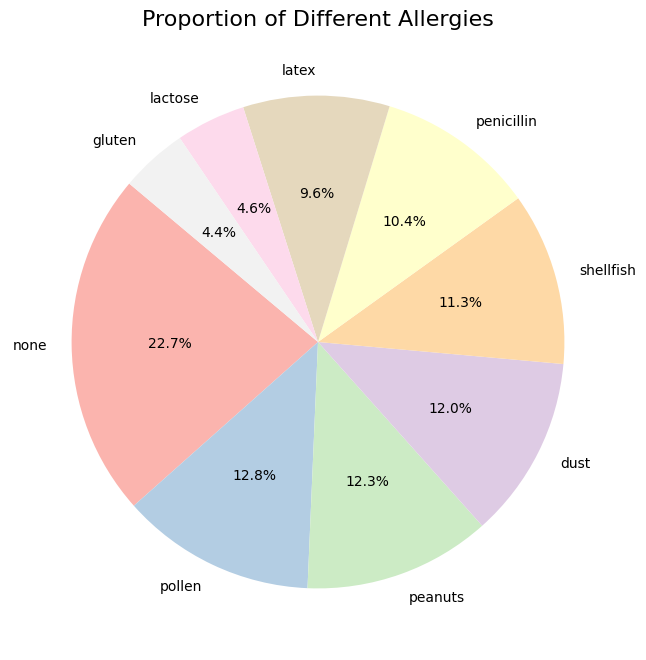

In [ ]:
# Allergy Distribution Pie Chart
plt.figure(figsize=(8, 8))
patient_data['Allergy'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proportion of Different Allergies', fontsize=16)
plt.ylabel('')  # Hide y-label for cleaner pie chart
plt.show()

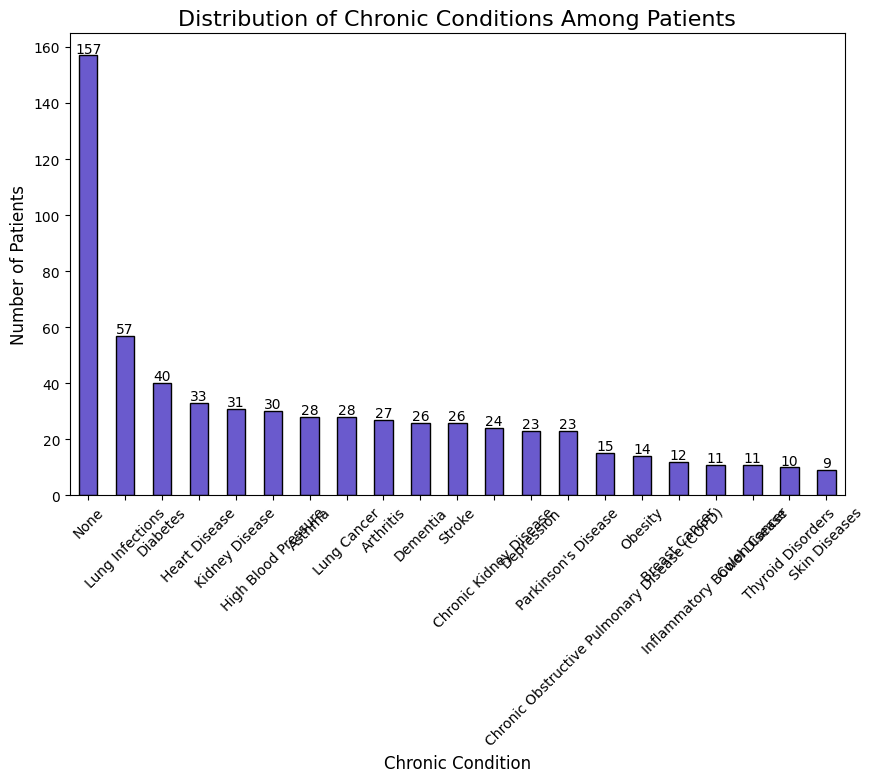

In [ ]:
patient_data['Chronic_condition'] = patient_data['Chronic_condition'].fillna('None')

# Bar Chart for frequency of chronic conditions
plt.figure(figsize=(10, 6))
ax = patient_data['Chronic_condition'].value_counts().plot(kind='bar', color='#6A5ACD', edgecolor='black')

# Annotating frequencies on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                ha='center', fontsize=10)

plt.title('Distribution of Chronic Conditions Among Patients', fontsize=16)
plt.xlabel('Chronic Condition', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.show()



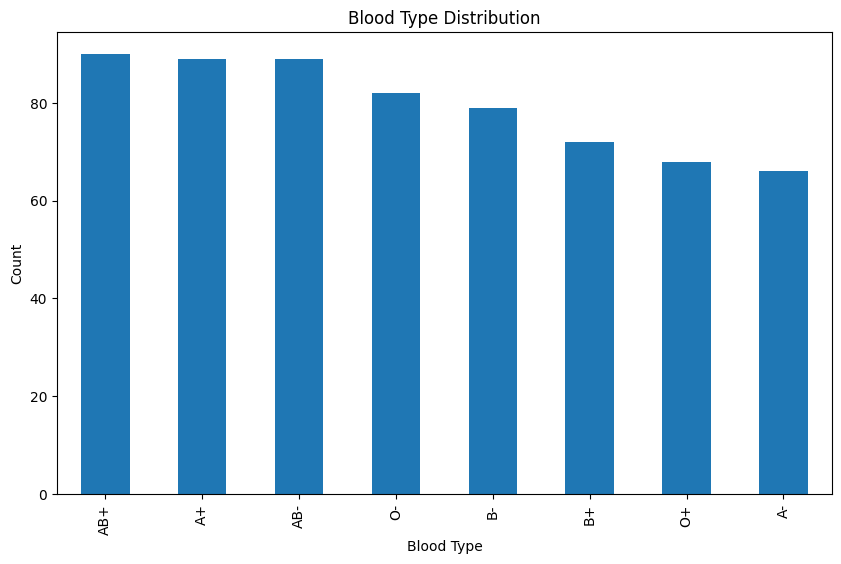

In [ ]:
blood_type_distribution = patient_data['Blood Type'].value_counts()
plt.figure(figsize=(10, 6))
blood_type_distribution.plot(kind='bar', title="Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.show()

<ipython-input-21-e7d2e7a2053a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = patient_data.groupby(['Age Group', 'Gender']).size().unstack()


<Figure size 1200x800 with 0 Axes>

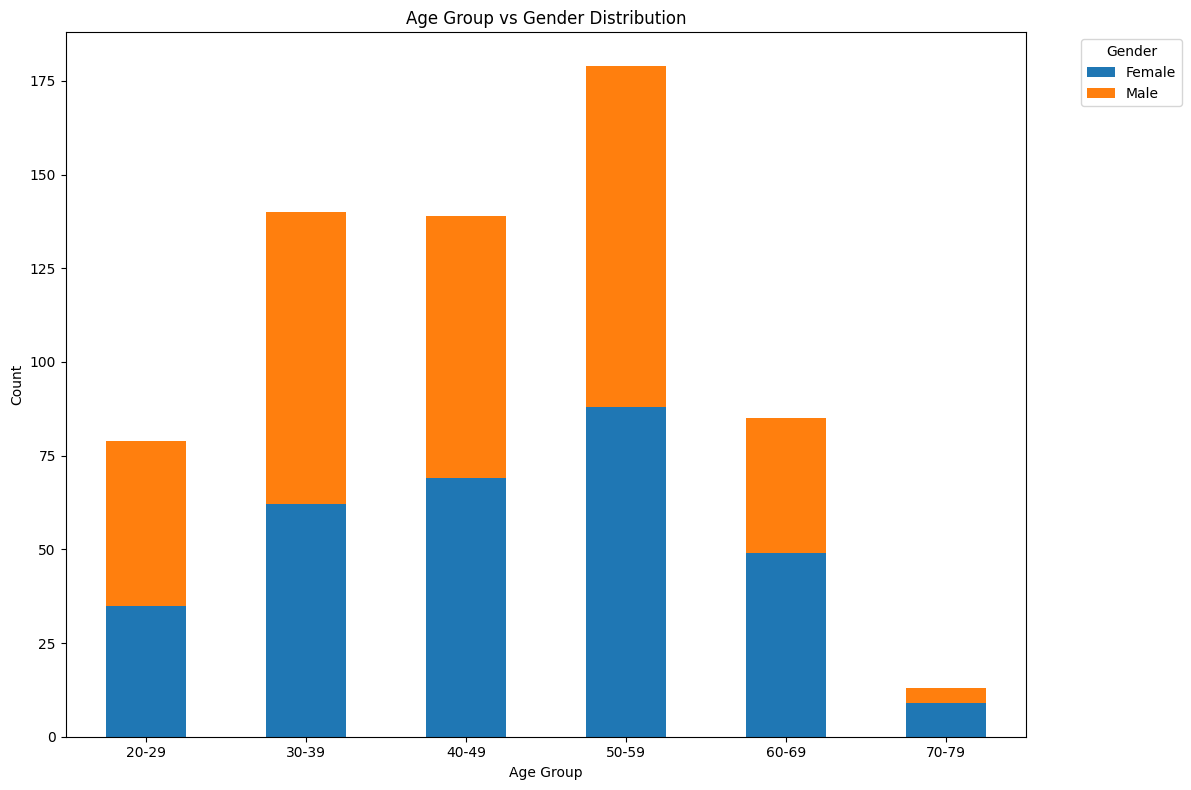

Gender,Female,Male
Age Group,,
20-29,35,44
30-39,62,78
40-49,69,70
50-59,88,91
60-69,49,36
70-79,9,4


In [ ]:
# Analyze the relationship between Age and Gender
# Grouping data by Gender and Age Group
age_gender_distribution = patient_data.groupby(['Age Group', 'Gender']).size().unstack()

# Plotting the relationship between Age Group and Gender
plt.figure(figsize=(12, 8))
age_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), title="Age Group vs Gender Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

age_gender_distribution


<ipython-input-8-8fcaabe3371c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chronic_condition_by_age = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack()


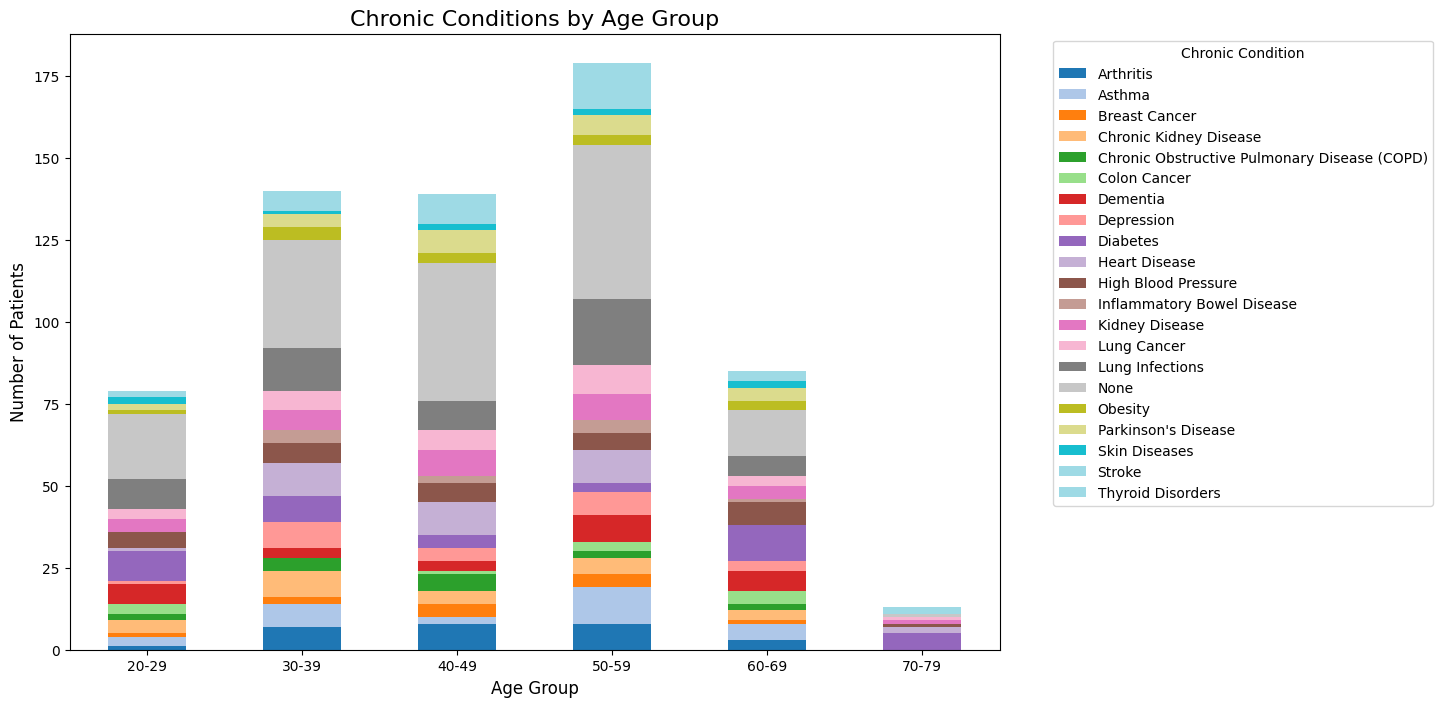

In [ ]:
# Creating age groups for stacked bar chart
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
patient_data['Age Group'] = pd.cut(patient_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Stacked Bar Chart for Chronic Conditions by Age Group
chronic_condition_by_age = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack()

chronic_condition_by_age.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Chronic Conditions by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='Chronic Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

<Figure size 1400x800 with 0 Axes>

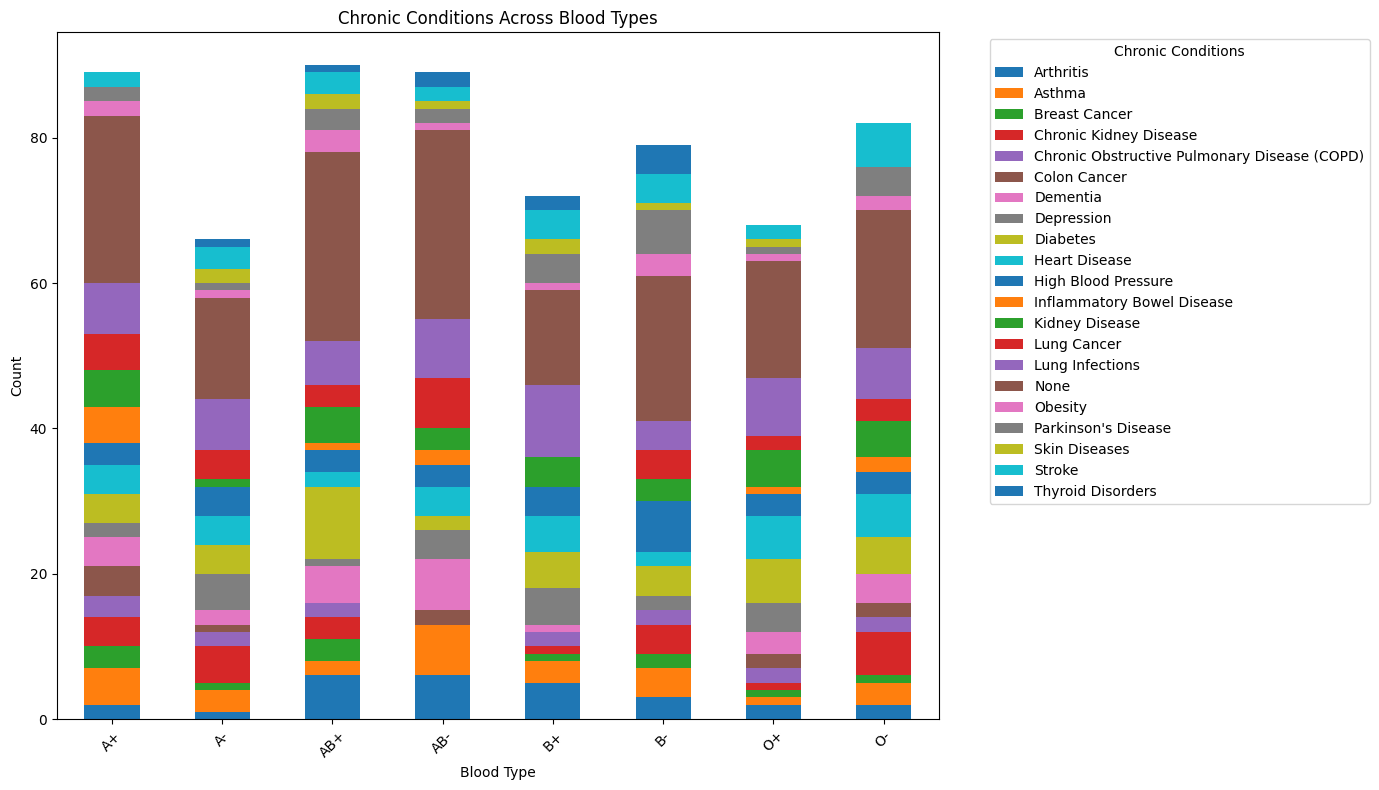

Chronic_condition,Arthritis,Asthma,Breast Cancer,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease (COPD),Colon Cancer,Dementia,Depression,Diabetes,Heart Disease,...,Inflammatory Bowel Disease,Kidney Disease,Lung Cancer,Lung Infections,None,Obesity,Parkinson's Disease,Skin Diseases,Stroke,Thyroid Disorders
Blood Type,,,,,,,,,,,,,,,,,,,,,
A+,2.0,5.0,3.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,...,5.0,5.0,5.0,7.0,23.0,2.0,2.0,NaN,2.0,NaN
A-,1.0,3.0,1.0,5.0,2.0,1.0,2.0,5.0,4.0,4.0,...,NaN,1.0,4.0,7.0,14.0,1.0,1.0,2.0,3.0,1.0
AB+,6.0,2.0,3.0,3.0,2.0,NaN,5.0,1.0,10.0,2.0,...,1.0,5.0,3.0,6.0,26.0,3.0,3.0,2.0,3.0,1.0
AB-,6.0,7.0,NaN,NaN,NaN,2.0,7.0,4.0,2.0,4.0,...,2.0,3.0,7.0,8.0,26.0,1.0,2.0,1.0,2.0,2.0
B+,5.0,3.0,1.0,1.0,2.0,NaN,1.0,5.0,5.0,5.0,...,NaN,4.0,NaN,10.0,13.0,1.0,4.0,2.0,4.0,2.0
B-,3.0,4.0,2.0,4.0,2.0,NaN,NaN,2.0,4.0,2.0,...,NaN,3.0,4.0,4.0,20.0,3.0,6.0,1.0,4.0,4.0
O+,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,6.0,6.0,...,1.0,5.0,2.0,8.0,16.0,1.0,1.0,1.0,2.0,NaN
O-,2.0,3.0,1.0,6.0,2.0,2.0,4.0,NaN,5.0,6.0,...,2.0,5.0,3.0,7.0,19.0,2.0,4.0,NaN,6.0,NaN


In [ ]:
# Analyze the relationship between Blood Type and Chronic Conditions
blood_chronic_distribution = patient_data.groupby(['Blood Type', 'Chronic_condition']).size().unstack()

# Plotting the relationship between Blood Type and Chronic Conditions
plt.figure(figsize=(14, 8))
blood_chronic_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), title="Chronic Conditions Across Blood Types")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Chronic Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

blood_chronic_distribution


<ipython-input-10-24346029251c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_chronic_pivot = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack(fill_value=0)


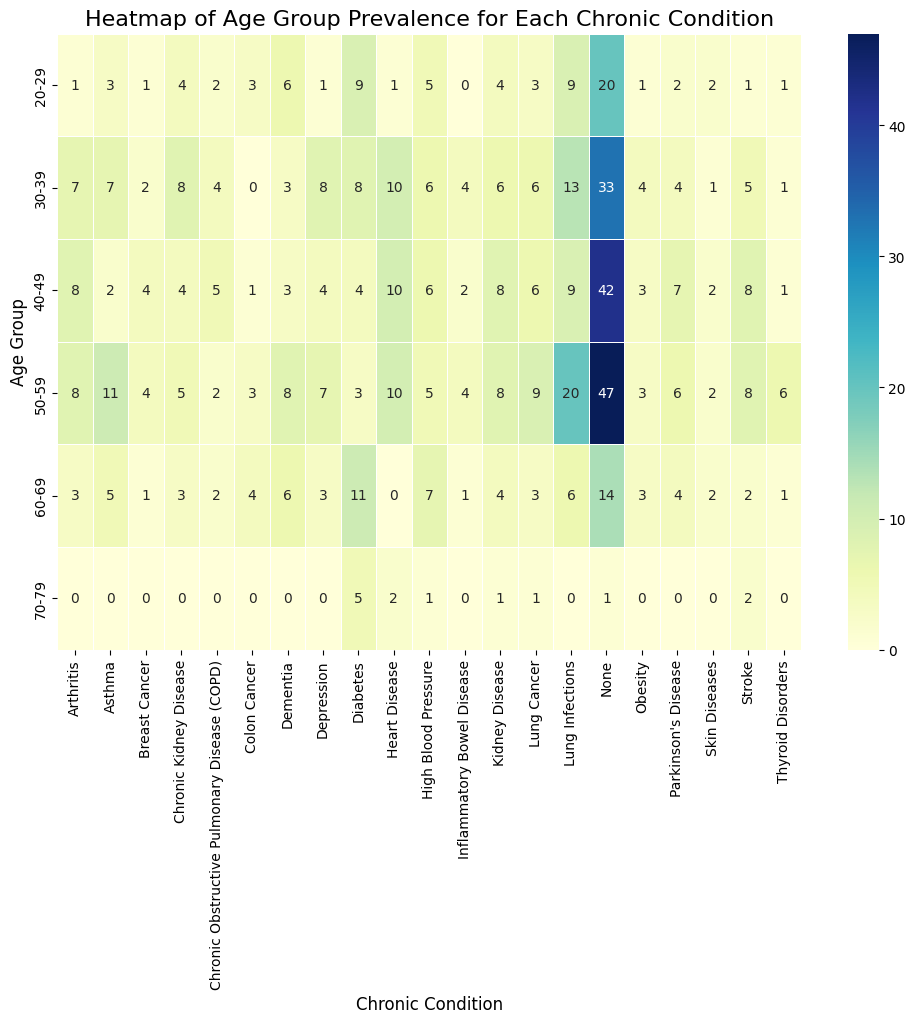

In [ ]:
import seaborn as sns
# Heatmap of Age Group Prevalence for Each Chronic Condition
# Pivoting the data for heatmap visualization
age_chronic_pivot = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(age_chronic_pivot, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Age Group Prevalence for Each Chronic Condition', fontsize=16)
plt.xlabel('Chronic Condition', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.show()

<ipython-input-11-639a30f6c75c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=patient_data, x='Chronic_condition', y='Age', palette='Set3')


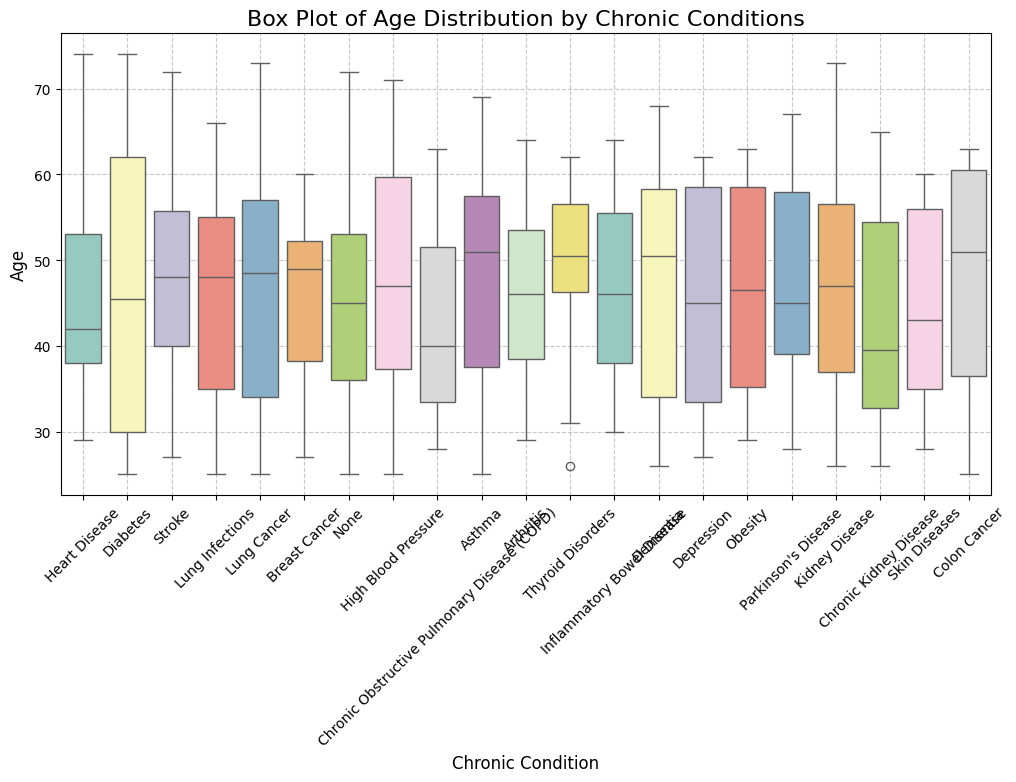

In [ ]:
# Box Plot for Age Distribution across Chronic Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(data=patient_data, x='Chronic_condition', y='Age', palette='Set3')
plt.title('Box Plot of Age Distribution by Chronic Conditions', fontsize=16)
plt.xlabel('Chronic Condition', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x800 with 0 Axes>

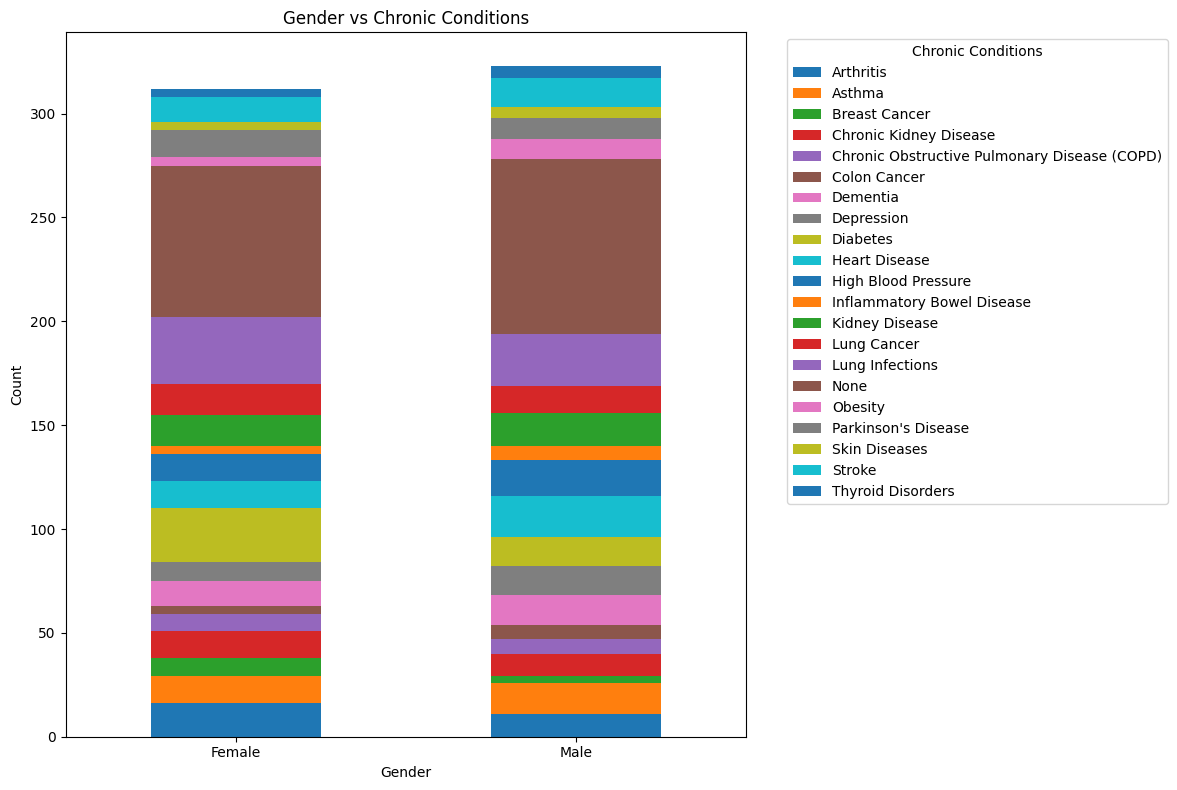

Chronic_condition,Arthritis,Asthma,Breast Cancer,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease (COPD),Colon Cancer,Dementia,Depression,Diabetes,Heart Disease,...,Inflammatory Bowel Disease,Kidney Disease,Lung Cancer,Lung Infections,None,Obesity,Parkinson's Disease,Skin Diseases,Stroke,Thyroid Disorders
Gender,,,,,,,,,,,,,,,,,,,,,
Female,16,13,9,13,8,4,12,9,26,13,...,4,15,15,32,73,4,13,4,12,4
Male,11,15,3,11,7,7,14,14,14,20,...,7,16,13,25,84,10,10,5,14,6


In [ ]:
# Analyze the relationship between Gender and Chronic_conditions
gender_chronic_distribution = patient_data.groupby(['Gender', 'Chronic_condition']).size().unstack()

# Plotting the relationship between Gender and Chronic_conditions
plt.figure(figsize=(12, 8))
gender_chronic_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), title="Gender vs Chronic Conditions")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Chronic Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

gender_chronic_distribution


<Figure size 1200x800 with 0 Axes>

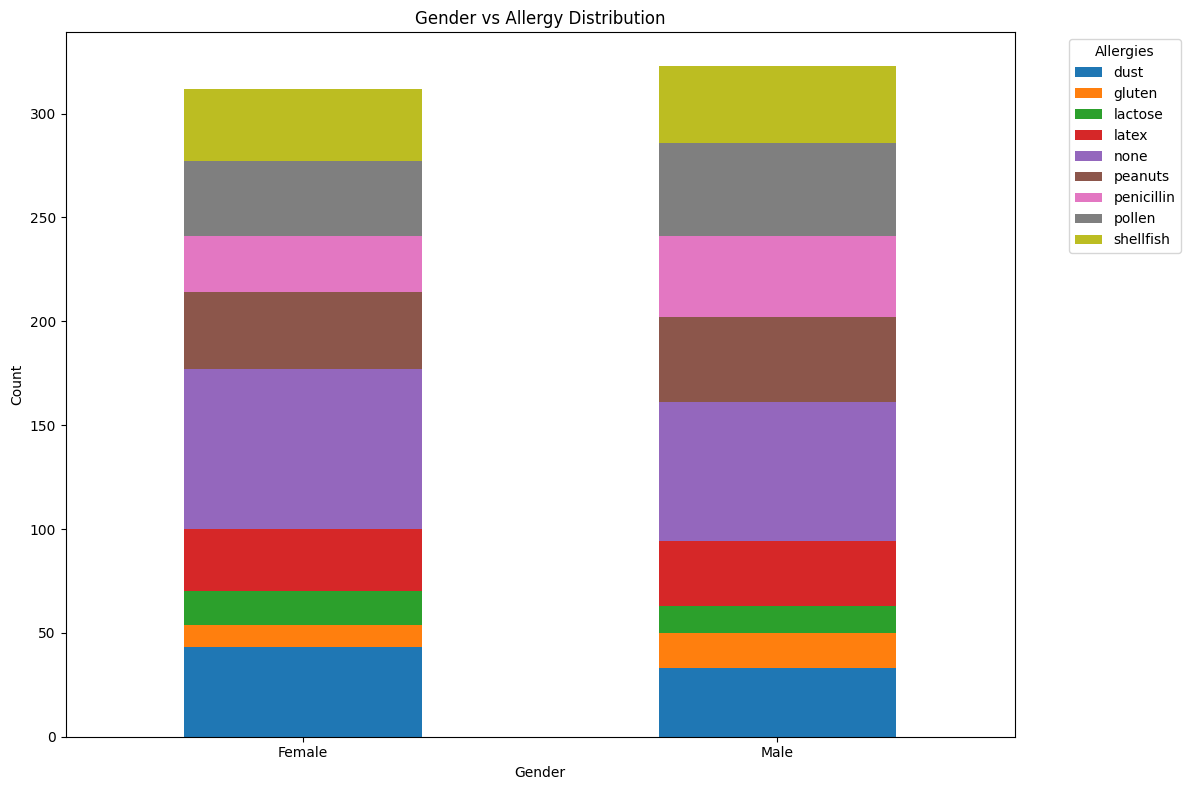

Allergy,dust,gluten,lactose,latex,none,peanuts,penicillin,pollen,shellfish
Gender,,,,,,,,,
Female,43,11,16,30,77,37,27,36,35
Male,33,17,13,31,67,41,39,45,37


In [ ]:
# Analyze the relationship between Gender and Allergy
gender_allergy_distribution = patient_data.groupby(['Gender', 'Allergy']).size().unstack()

# Plotting the relationship between Gender and Allergy
plt.figure(figsize=(12, 8))
gender_allergy_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), title="Gender vs Allergy Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Allergies", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

gender_allergy_distribution


<Figure size 1200x800 with 0 Axes>

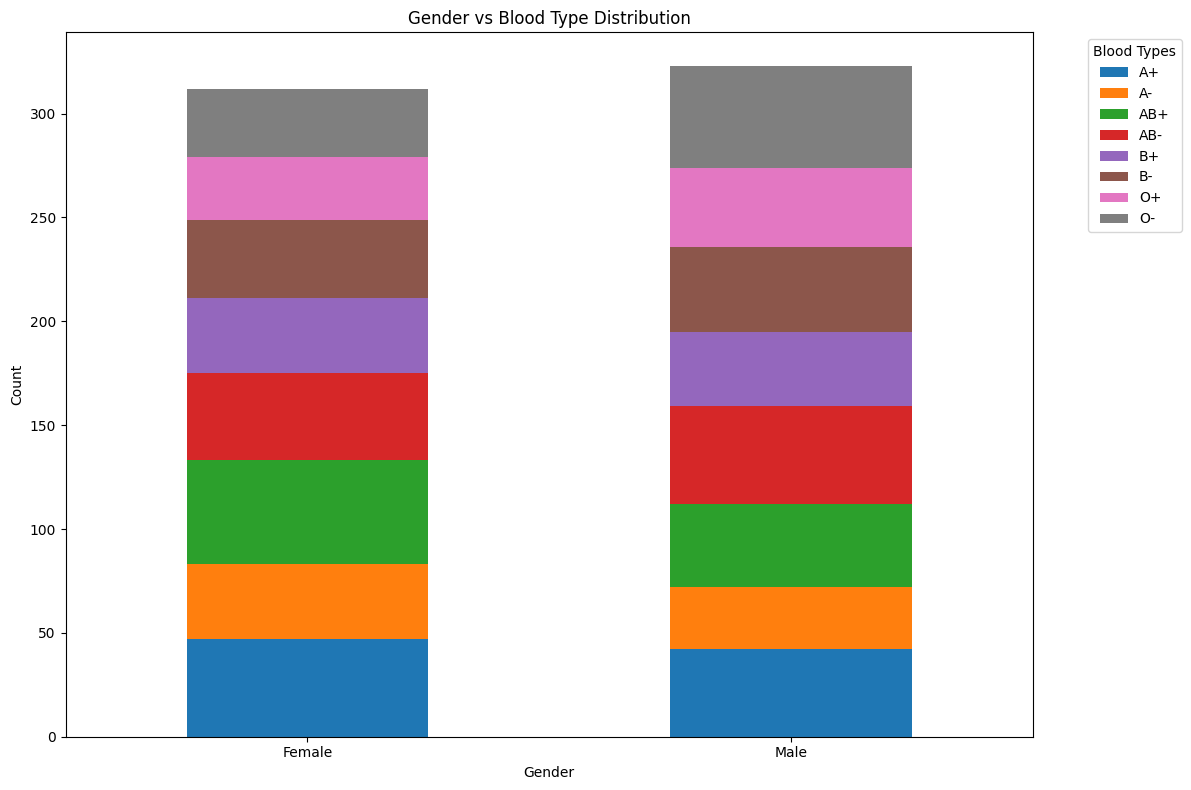

Blood Type,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
Female,47,36,50,42,36,38,30,33
Male,42,30,40,47,36,41,38,49


In [ ]:
gender_bloodtype_distribution = patient_data.groupby(['Gender', 'Blood Type']).size().unstack()

# Plotting the relationship between Gender and Blood Type
plt.figure(figsize=(12, 8))
gender_bloodtype_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), title="Gender vs Blood Type Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Blood Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

gender_bloodtype_distribution

<ipython-input-24-d6fe0db61824>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_allergy_distribution = patient_data.groupby(['Age Group', 'Allergy']).size().unstack()


<Figure size 1400x800 with 0 Axes>

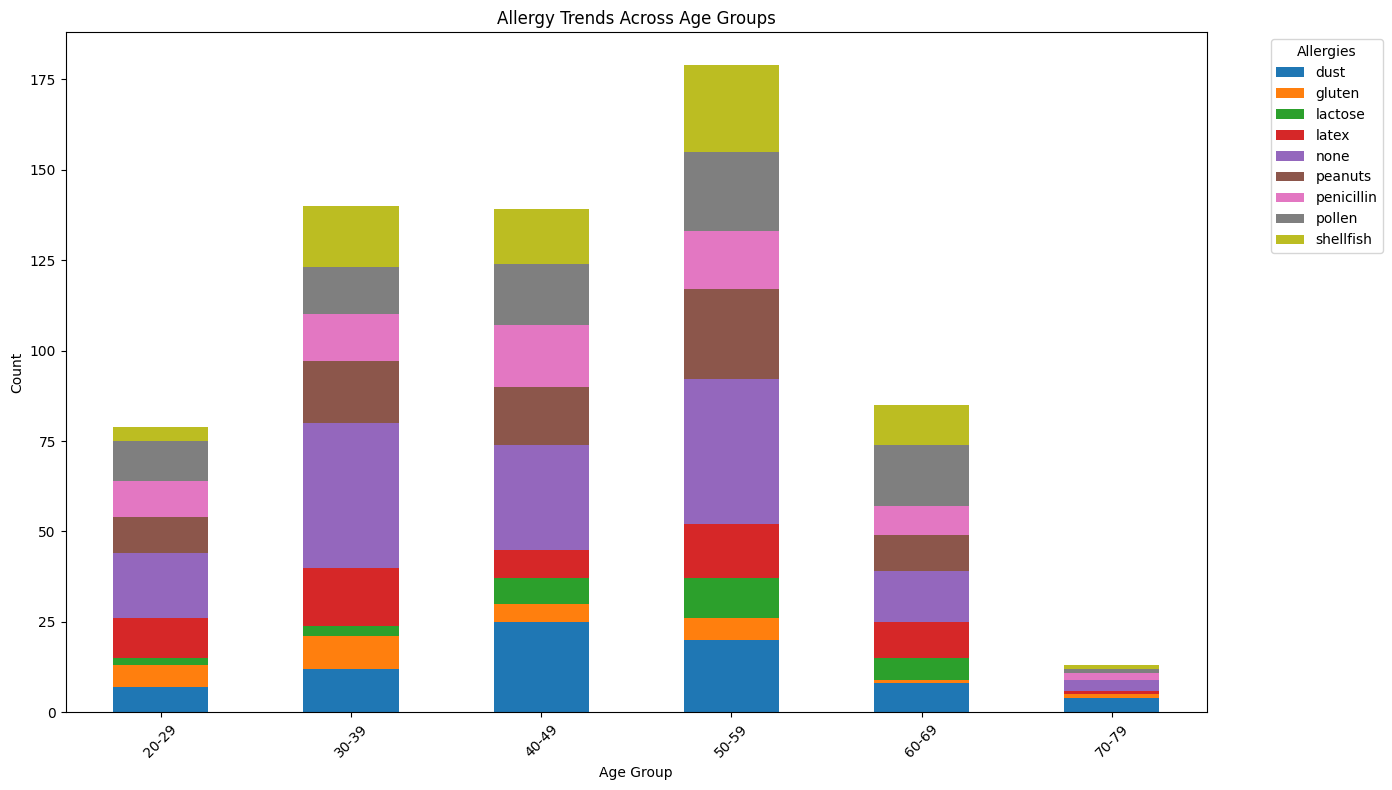

Allergy,dust,gluten,lactose,latex,none,peanuts,penicillin,pollen,shellfish
Age Group,,,,,,,,,
20-29,7,6,2,11,18,10,10,11,4
30-39,12,9,3,16,40,17,13,13,17
40-49,25,5,7,8,29,16,17,17,15
50-59,20,6,11,15,40,25,16,22,24
60-69,8,1,6,10,14,10,8,17,11
70-79,4,1,0,1,3,0,2,1,1


In [ ]:
# Analyze the relationship between Age Groups and Allergies
age_allergy_distribution = patient_data.groupby(['Age Group', 'Allergy']).size().unstack()

# Plotting the relationship between Age Groups and Allergies
plt.figure(figsize=(14, 8))
age_allergy_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), title="Allergy Trends Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Allergies", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

age_allergy_distribution


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

# 1. Gender vs Allergy Type
gender_allergy_table = patient_data.groupby(['Gender', 'Allergy']).size().unstack(fill_value=0)
chi2_gender_allergy, p_gender_allergy, dof_gender_allergy, _ = chi2_contingency(gender_allergy_table)

# 2. Age Group vs Allergy Type
age_allergy_table = patient_data.groupby(['Age Group', 'Allergy']).size().unstack(fill_value=0)
chi2_age_allergy, p_age_allergy, dof_age_allergy, _ = chi2_contingency(age_allergy_table)

# 3. Gender vs Chronic Conditions
gender_chronic_table = patient_data.groupby(['Gender', 'Chronic_condition']).size().unstack(fill_value=0)
chi2_gender_chronic, p_gender_chronic, dof_gender_chronic, _ = chi2_contingency(gender_chronic_table)

# Prepare results
chi_square_results = {
    "Test": ["Gender vs Allergy", "Age Group vs Allergy", "Gender vs Chronic Conditions"],
    "Chi-Square Value": [chi2_gender_allergy, chi2_age_allergy, chi2_gender_chronic],
    "p-Value": [p_gender_allergy, p_age_allergy, p_gender_chronic],
    "Degrees of Freedom": [dof_gender_allergy, dof_age_allergy, dof_gender_chronic]
}

chi_square_df = pd.DataFrame(chi_square_results)

# Display the DataFrame using pandas' display function
# This replaces the call to the non-existent 'ace_tools'
display(chi_square_df)

<ipython-input-29-36208c7bf2d6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_allergy_table = patient_data.groupby(['Age Group', 'Allergy']).size().unstack(fill_value=0)


,Test,Chi-Square Value,p-Value,Degrees of Freedom
0,Gender vs Allergy,6.876701,0.549992,8
1,Age Group vs Allergy,43.687713,0.317629,40
2,Gender vs Chronic Conditions,18.045484,0.584412,20


In [ ]:
# Blood Type vs Chronic Conditions
blood_chronic_table = patient_data.groupby(['Blood Type', 'Chronic_condition']).size().unstack(fill_value=0)
chi2_blood_chronic, p_blood_chronic, dof_blood_chronic, _ = chi2_contingency(blood_chronic_table)

# Blood Type vs Allergies
blood_allergy_table = patient_data.groupby(['Blood Type', 'Allergy']).size().unstack(fill_value=0)
chi2_blood_allergy, p_blood_allergy, dof_blood_allergy, _ = chi2_contingency(blood_allergy_table)

# Age Group vs Chronic Conditions
age_chronic_table = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack(fill_value=0)
chi2_age_chronic, p_age_chronic, dof_age_chronic, _ = chi2_contingency(age_chronic_table)

# Age Group vs Blood Type
age_blood_table = patient_data.groupby(['Age Group', 'Blood Type']).size().unstack(fill_value=0)
chi2_age_blood, p_age_blood, dof_age_blood, _ = chi2_contingency(age_blood_table)

# Chronic Conditions vs Allergies
chronic_allergy_table = patient_data.groupby(['Chronic_condition', 'Allergy']).size().unstack(fill_value=0)
chi2_chronic_allergy, p_chronic_allergy, dof_chronic_allergy, _ = chi2_contingency(chronic_allergy_table)

# Prepare results
additional_chi_square_results = {
    "Test": [
        "Blood Type vs Chronic Conditions",
        "Blood Type vs Allergies",
        "Age Group vs Chronic Conditions",
        "Age Group vs Blood Type",
        "Chronic Conditions vs Allergies"
    ],
    "Chi-Square Value": [
        chi2_blood_chronic, chi2_blood_allergy, chi2_age_chronic, chi2_age_blood, chi2_chronic_allergy
    ],
    "p-Value": [
        p_blood_chronic, p_blood_allergy, p_age_chronic, p_age_blood, p_chronic_allergy
    ],
    "Degrees of Freedom": [
        dof_blood_chronic, dof_blood_allergy, dof_age_chronic, dof_age_blood, dof_chronic_allergy
    ]
}

additional_chi_square_df = pd.DataFrame(additional_chi_square_results)


display(additional_chi_square_df)


<ipython-input-37-3c1fb8b889a9>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_chronic_table = patient_data.groupby(['Age Group', 'Chronic_condition']).size().unstack(fill_value=0)
<ipython-input-37-3c1fb8b889a9>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_blood_table = patient_data.groupby(['Age Group', 'Blood Type']).size().unstack(fill_value=0)


,Test,Chi-Square Value,p-Value,Degrees of Freedom
0,Blood Type vs Chronic Conditions,136.947654,0.557182,140
1,Blood Type vs Allergies,55.294393,0.501533,56
2,Age Group vs Chronic Conditions,124.084941,0.051645,100
3,Age Group vs Blood Type,25.888281,0.868537,35
4,Chronic Conditions vs Allergies,144.882718,0.798334,160
